# Diabetes Prediction — Machine Learning Classification

## Project Overview
The goal of this project is to build a machine learning classifier that predicts whether a patient has diabetes based on medical and demographic features.

The task was completed as part of a competitive Data Science bootcamp, with no restrictions on feature engineering, encoding methods, or model selection.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('P02/training_data.csv', index_col=0) 

## Dataset Description

The dataset contains medical and demographic information about patients, along with a binary target variable indicating the presence of diabetes.

**Training data shape:** (73,718 rows × 10 columns)  
**Test data shape:** (26,146 rows × 9 columns)

### Features include:
- Age
- Gender
- Body Mass Index (BMI)
- Hypertension
- Heart disease
- Smoking history
- HbA1c level
- Blood glucose level

The test dataset does not include the target variable and is used for final prediction submission.


## Exploratory Data Analysis (EDA)

In this section, we explore the structure of the dataset, inspect missing values, and analyze basic feature distributions to better understand the data before modeling.


In [3]:
df.head()

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,78830894-cdd8-43d1-9655-03db74141b7a,Female,80.0,0,1,never,25.19,6.6,140,0
1,32262c0e-903a-46b8-9061-b1a2f5a3e9b2,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,c4868b73-ca90-48ed-af14-3d1f78a5f030,Male,28.0,0,0,never,27.32,5.7,158,0
3,bec2ef91-5aff-48df-ac16-cb210b5f29fa,Female,36.0,0,0,current,23.45,5.0,155,0
4,1a6852a8-ee80-4d93-bea0-f0cdd941dc3d,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
73713,5c890971-a6d7-44ce-a8a1-3b38cda7ef3b,Female,70.0,1,0,never,55.57,6.2,130,1
73714,13a8f177-1623-4acf-9db8-1e8ac8577c86,Male,60.0,0,0,No Info,27.32,6.6,160,0
73715,c9539d1b-075f-481f-8ae4-ab9bba75af5b,Male,65.0,0,0,former,32.07,5.0,160,0
73716,08eb5a8d-f577-440a-9408-c6d99ca17204,Male,64.0,0,0,current,30.23,6.2,158,0
73717,a98d816c-f44e-4329-930b-58466aaa0bc7,Female,30.0,0,0,never,19.30,6.2,155,0


In [5]:
df.shape

(73718, 10)

## Data Preprocessing

The following preprocessing steps were applied:
- Handling missing values
- Encoding categorical variables
- Feature scaling where appropriate
- Train-validation split

These steps ensure the data is suitable for training tree-based machine learning models.orig_len = len(df)
orig_len

In [7]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,41.852959,0.078963,0.040858,27.348037,5.534038,138.197835,0.088852
std,22.488153,0.269683,0.197963,6.776093,1.070917,40.892972,0.284532
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.430000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.900000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73718 entries, 0 to 73717
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   73718 non-null  object 
 1   gender               73718 non-null  object 
 2   age                  73718 non-null  float64
 3   hypertension         73718 non-null  int64  
 4   heart_disease        73718 non-null  int64  
 5   smoking_history      73718 non-null  object 
 6   bmi                  73718 non-null  float64
 7   HbA1c_level          73718 non-null  float64
 8   blood_glucose_level  73718 non-null  int64  
 9   diabetes             73718 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 6.2+ MB


### What can be inferred earlier operations:

- there are numerical features - ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

- there are categorical features - ['gender', 'hypertension', 'heart_disease', 'smoking_history']

- the target feature - ['diabetes']

In [10]:
df.shape

(73718, 10)

The DataFrame is quite big, now lets see how many people have and how many people don't have diabetes.

In [11]:
df['diabetes'].value_counts()

diabetes
0    67168
1     6550
Name: count, dtype: int64

There is a reasonable number of people with diabetes, not too strong clas imbalance

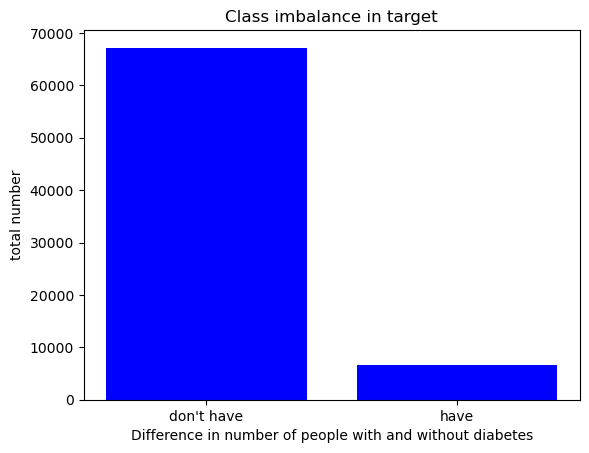

In [12]:
import matplotlib.pyplot as plt
plt.bar(["don't have", "have"], df['diabetes'].value_counts(), color='blue')
plt.title("Class imbalance in target")
plt.xlabel('Difference in number of people with and without diabetes')
plt.ylabel("total number")
plt.show()

Let's do EDA part, analyze how important each feature is, build correlation to detect multicollinearity

In [13]:
df.groupby('diabetes')['age'].mean()

diabetes
0    39.992518
1    60.931145
Name: age, dtype: float64

Let's draw Scatterplot for all numeric features to see relationship between target (diabetes factor) and numeric features

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<Axes: xlabel='gender', ylabel='diabetes'>

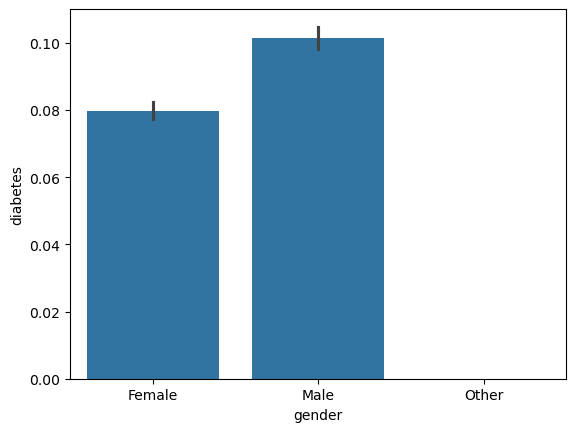

In [15]:
sns.barplot(x="gender", y="diabetes", data=df)

In [16]:
df['gender'].value_counts()

gender
Female    43097
Male      30609
Other        12
Name: count, dtype: int64

In [17]:
df = df[df['gender'].isin(['Female', 'Male'])]

In [18]:
df['gender'] = df['gender'].replace('Other', 'Female')

<Axes: xlabel='hypertension', ylabel='diabetes'>

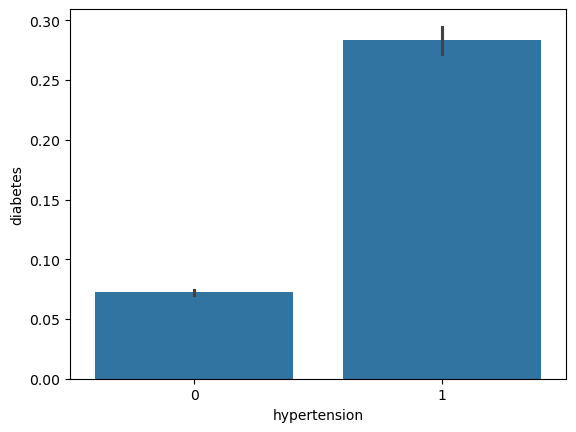

In [19]:
sns.barplot(x="hypertension", y="diabetes", data=df)

In [20]:
df['hypertension'].value_counts()

hypertension
0    67885
1     5821
Name: count, dtype: int64

<Axes: xlabel='heart_disease', ylabel='diabetes'>

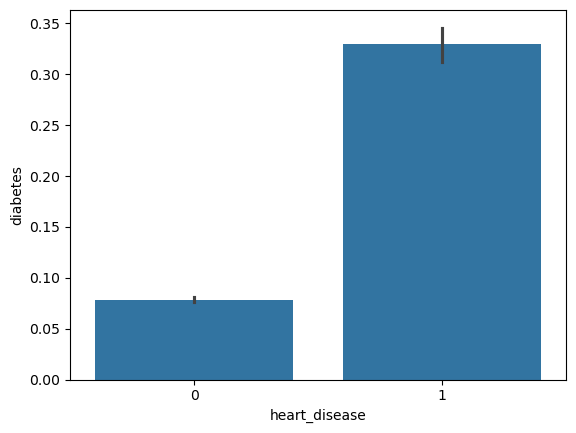

In [21]:
sns.barplot(x="heart_disease", y="diabetes", data=df)

In [22]:
df['heart_disease'].value_counts()

heart_disease
0    70694
1     3012
Name: count, dtype: int64

<Axes: xlabel='smoking_history', ylabel='diabetes'>

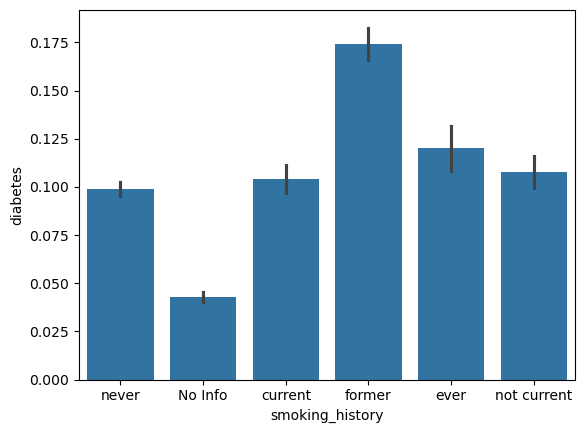

In [23]:
sns.barplot(x="smoking_history", y="diabetes", data=df)

<Axes: xlabel='diabetes', ylabel='age'>

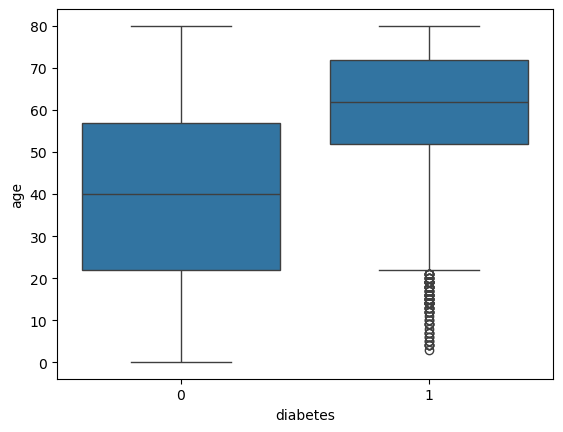

In [24]:
sns.boxplot(x='diabetes', y='age', data=df)

<Axes: xlabel='diabetes', ylabel='bmi'>

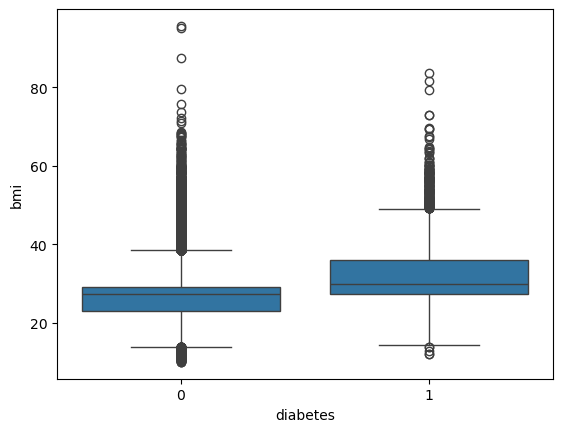

In [25]:
sns.boxplot(x='diabetes', y='bmi', data=df)

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

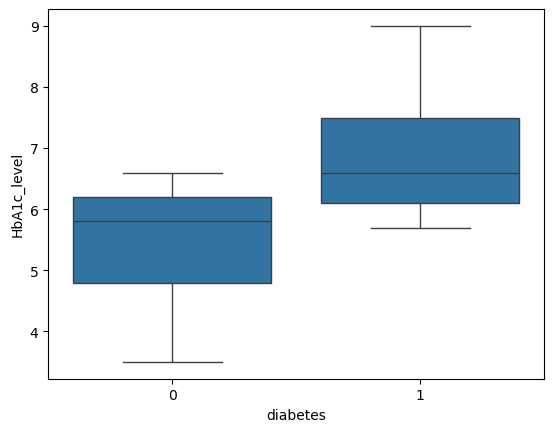

In [26]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

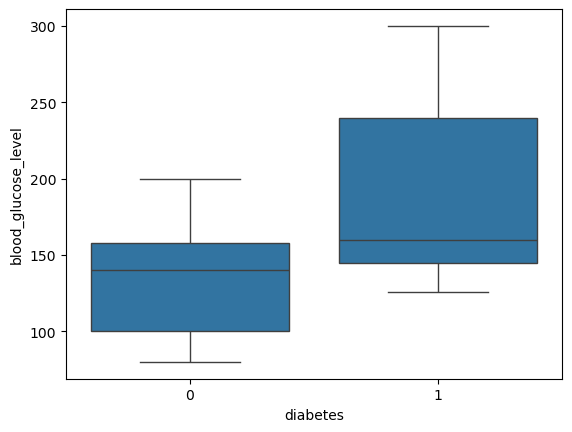

In [27]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)

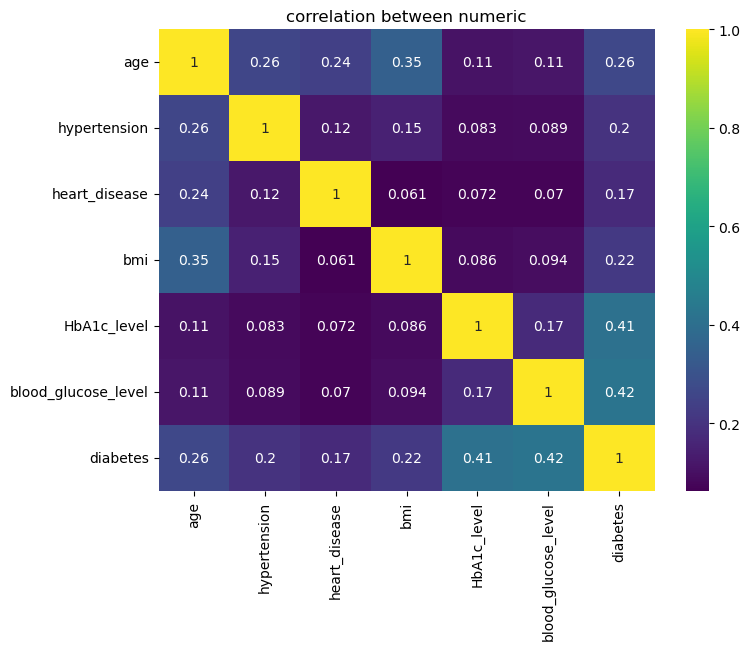

In [28]:
corr = df.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('correlation between numeric')
plt.show()

In [29]:
num_cat = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']
categ_cat = ['gender', 'smoking_history', 'hypertension', 'heart_disease']
id1 = ['ID']
prep = ['hypertension', 'heart_disease']

In [30]:
for cat in num_cat:
    print(f'[INFO] Feature {cat}')
    print(df[cat].value_counts())
    print('\n')

[INFO] Feature age
age
80.00    3832
53.00    1178
51.00    1172
47.00    1160
48.00    1158
         ... 
1.16       63
1.88       56
0.16       51
0.40       48
0.08       25
Name: count, Length: 102, dtype: int64


[INFO] Feature bmi
bmi
27.32    16645
24.96       81
25.00       78
24.50       77
23.00       76
         ...  
53.79        1
53.57        1
56.14        1
48.31        1
49.91        1
Name: count, Length: 4069, dtype: int64


[INFO] Feature HbA1c_level
HbA1c_level
6.5    6263
5.7    6253
6.6    6227
6.0    6121
6.2    6118
5.8    6115
6.1    5838
4.8    5635
4.5    5572
3.5    5552
4.0    5519
5.0    5500
6.8     510
8.8     508
7.5     500
7.0     498
8.2     490
9.0     487
Name: count, dtype: int64


[INFO] Feature blood_glucose_level
blood_glucose_level
159    5734
130    5730
126    5718
160    5672
145    5654
140    5638
200    5585
155    5576
90     5306
100    5220
80     5171
158    5164
85     5037
280     549
300     515
260     493
240     483
220     46

In age and bmi, some outliers can be noticed, which we already saw in boxplot -> remove outliers

In [31]:
for cat in categ_cat:
    print(f'[INFO] Feature {cat}')
    print(df[cat].value_counts())
    print('\n')

[INFO] Feature gender
gender
Female    43097
Male      30609
Name: count, dtype: int64


[INFO] Feature smoking_history
smoking_history
never          26295
No Info        25231
former          7150
current         7035
not current     4953
ever            3042
Name: count, dtype: int64


[INFO] Feature hypertension
hypertension
0    67885
1     5821
Name: count, dtype: int64


[INFO] Feature heart_disease
heart_disease
0    70694
1     3012
Name: count, dtype: int64




In [32]:
df['smoking_history'].value_counts()

smoking_history
never          26295
No Info        25231
former          7150
current         7035
not current     4953
ever            3042
Name: count, dtype: int64

In [33]:
df['smoking_history'] = df['smoking_history'].replace({
    'former': 'former',
    'not current': 'former',
    'ever': 'current',
    'No Info': 'unknown'
    
})

In [34]:
for cat in categ_cat:
    print(f'[INFO] Feature {cat}')
    print(df[cat].value_counts())
    print('\n')

[INFO] Feature gender
gender
Female    43097
Male      30609
Name: count, dtype: int64


[INFO] Feature smoking_history
smoking_history
never      26295
unknown    25231
former     12103
current    10077
Name: count, dtype: int64


[INFO] Feature hypertension
hypertension
0    67885
1     5821
Name: count, dtype: int64


[INFO] Feature heart_disease
heart_disease
0    70694
1     3012
Name: count, dtype: int64




In [35]:
X = df.iloc[:, :-1]
X

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,78830894-cdd8-43d1-9655-03db74141b7a,Female,80.0,0,1,never,25.19,6.6,140
1,32262c0e-903a-46b8-9061-b1a2f5a3e9b2,Female,54.0,0,0,unknown,27.32,6.6,80
2,c4868b73-ca90-48ed-af14-3d1f78a5f030,Male,28.0,0,0,never,27.32,5.7,158
3,bec2ef91-5aff-48df-ac16-cb210b5f29fa,Female,36.0,0,0,current,23.45,5.0,155
4,1a6852a8-ee80-4d93-bea0-f0cdd941dc3d,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...,...
73713,5c890971-a6d7-44ce-a8a1-3b38cda7ef3b,Female,70.0,1,0,never,55.57,6.2,130
73714,13a8f177-1623-4acf-9db8-1e8ac8577c86,Male,60.0,0,0,unknown,27.32,6.6,160
73715,c9539d1b-075f-481f-8ae4-ab9bba75af5b,Male,65.0,0,0,former,32.07,5.0,160
73716,08eb5a8d-f577-440a-9408-c6d99ca17204,Male,64.0,0,0,current,30.23,6.2,158


In [36]:
y = df[['diabetes']]

In [37]:
y

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
73713,1
73714,0
73715,0
73716,0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

In [39]:
X_train = X_train.drop(columns=['ID'])
X_val = X_val.drop(columns=['ID'])

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_gen = pd.Series(le.fit_transform(X_train['gender']), name='gender', index=X_train.index)
y_gen = pd.Series(le.transform(X_val['gender']), name='gender', index=X_val.index)

In [41]:
y_gen

57818    1
42880    1
28940    0
52939    0
10177    1
        ..
49035    0
59444    0
51446    0
31536    1
22990    1
Name: gender, Length: 22112, dtype: int64

In [42]:
x_train_sh = pd.get_dummies(X_train['smoking_history'], prefix='smoking_history')
x_val_sh = pd.get_dummies(X_val['smoking_history'], prefix='smoking_history')

x_train_sh, x_val_sh = x_train_sh.align(x_val_sh, join='outer', axis=1, fill_value=0)

In [43]:
x_train_sh

,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_unknown
52887,False,False,False,True
73242,False,True,False,False
28325,False,False,True,False
69262,False,True,False,False
13112,False,False,False,True
...,...,...,...,...
69681,True,False,False,False
12778,False,False,True,False
10141,False,False,False,True
66438,False,False,False,True


In [44]:
x_train_sh.drop(columns=['smoking_history_former'], inplace=True)
x_val_sh.drop(columns=['smoking_history_former'], inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_num_sc = sc.fit_transform(X_train[num_cat])
x_val_num_sc = sc.transform(X_val[num_cat])

In [46]:
x_train_num_sc

array([[ 0.04891324, -0.05821649, -1.43331187,  0.53702476],
       [ 0.93955429, -1.03004732, -1.90085456,  0.53702476],
       [-1.06438808, -0.77562586, -1.43331187,  0.04693619],
       ...,
       [-1.55424066, -1.8805842 ,  0.53036744,  0.51252033],
       [-1.64330477, -0.67947821, -1.90085456,  0.51252033],
       [ 0.53876582, -0.03307018,  0.15633329,  2.49737907]])

In [47]:
x_train_bin = X_train[['hypertension','heart_disease']]
x_val_bin   = X_val[['hypertension','heart_disease']]

In [48]:
x_train_scaled_df = pd.DataFrame(x_train_num_sc, columns=num_cat, index=X_train.index)
x_val_scaled_df = pd.DataFrame(x_val_num_sc, columns=num_cat, index=X_val.index)

X_train = pd.concat(
    [
        x_train_scaled_df, 
        x_train_sh, 
        x_train_bin,
        x_gen
    ], axis=1
)

X_val = pd.concat(
    [
        x_val_scaled_df,
        x_val_sh,
        x_val_bin,
        y_gen
    ], axis=1
)

X_train

,age,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_never,smoking_history_unknown,hypertension,heart_disease,gender
52887,0.048913,-0.058216,-1.433312,0.537025,False,False,True,0,0,1
73242,0.939554,-1.030047,-1.900855,0.537025,False,False,False,1,0,0
28325,-1.064388,-0.775626,-1.433312,0.046936,False,True,False,0,0,1
69262,1.696599,-0.354055,0.249842,0.488016,False,False,False,0,0,0
13112,0.449702,-0.003486,-1.900855,1.517202,False,False,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...
69681,0.182509,3.073238,-0.685244,-1.178285,True,False,False,0,0,0
12778,-1.064388,0.116328,-1.433312,-0.198108,False,True,False,0,0,0
10141,-1.554241,-1.880584,0.530367,0.512520,False,False,True,0,0,0
66438,-1.643305,-0.679478,-1.900855,0.512520,False,False,True,0,0,0


## Model Training and Hyperparameter Tuning

A Random Forest classifier was selected due to its robustness on tabular data and ability to model non-linear feature interactions.

Hyperparameter tuning was performed using RandomizedSearchCV to efficiently explore the parameter space and improve model performance.


In [49]:
# first, let's apply baseline randomforest, then we will add GridSearch with CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [50]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)
y_pred_v = rf.predict(X_val)

fs = f1_score(y_train, y_pred)
fs1 = f1_score(y_val, y_pred_v)

print("on training set:", fs)
print("on validation set:", fs1)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


on training set: 0.9966116515466171
on validation set: 0.8206459054209919


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

param_dist = {
    "max_depth": [1, 3, 5],
    "min_samples_leaf": [1, 3, 7],
    "n_estimators": [100, 200, 300],
    "max_features": [10, 20, 30]
}

clf = RandomForestClassifier()

random = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=7, cv=3, random_state=42, scoring='f1')

model = random.fit(X_train, y_train.values.ravel())
modelf = model.best_estimator_

y_pred = modelf.predict(X_train)
y_pred_v = modelf.predict(X_val)

fs = f1_score(y_train, y_pred)
fs1 = f1_score(y_val, y_pred_v)

print("best hyperparameters are ", model.best_params_)
print("best score: ", model.best_score_)
print("on training set:", fs)
print("on validation set:", fs1)

best hyperparameters are  {'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 10, 'max_depth': 3}
best score:  0.7945229534849357
on training set: 0.7945313527014591
on validation set: 0.8126888217522659


## Model Evaluation

The model was evaluated using appropriate classification metrics, with a focus on F1-score due to class imbalance considerations.

**Best validation F1-score:** 0.81

The tuned model demonstrates strong predictive performance on unseen data.


In [52]:
df_test = pd.read_csv('P02/test_data.csv', index_col=0)

In [53]:
df_test

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,ba0d6256-ca6e-46a7-a2fb-2518a8937fd7,Female,60.0,1,0,former,23.77,4.8,130
1,7102b1ab-c7a4-4a43-b1fc-cb588d0553b8,Male,2.0,0,0,No Info,15.19,5.0,159
2,51ba207e-4934-41b4-a31c-cd275c5ca555,Female,74.0,0,0,not current,39.59,6.5,160
3,7e17faaa-0402-4728-9719-83982eba3afd,Female,51.0,0,0,never,26.67,6.6,80
4,08b4e515-286e-4393-9a55-138962f9546e,Male,35.0,0,0,never,26.09,3.5,159
...,...,...,...,...,...,...,...,...,...
26141,1f8db6fe-03f8-48ca-9a42-9f12062b002d,Female,31.0,0,0,never,27.32,6.1,140
26142,5bf3ca1a-ced5-474b-a354-cc3bec9f16d3,Female,65.0,1,1,never,27.25,5.7,100
26143,930e6345-a920-47dd-abd0-6bc0be2ae56f,Male,30.0,1,0,former,57.17,5.8,300
26144,035f3cc4-e8af-448a-8172-a1b027e06de1,Male,20.0,0,0,never,32.70,6.2,159


In [54]:
df_test['gender'] = df_test['gender'].replace('Other', 'Female')

In [55]:
df_test['smoking_history'] = df_test['smoking_history'].replace({
    'former': 'former',
    'not current': 'former',
    'ever': 'current',
    'No Info': 'unknown'
    
})

In [56]:
x_test_gen = pd.Series(le.transform(df_test['gender']), name='gender', index=df_test.index)


In [57]:
x_test_sh = pd.get_dummies(df_test['smoking_history'], prefix='smoking_history')

In [58]:
x_test_sh = x_test_sh.drop(columns=['smoking_history_former'])

In [59]:
x_test_sh, _ = x_test_sh.align(x_train_sh, join='outer', axis=1, fill_value = 0)

In [60]:
x_test_num_sc = sc.transform(df_test[num_cat])

In [61]:
x_test_num_sc = pd.DataFrame(x_test_num_sc, columns=num_cat, index=df_test.index)  

In [62]:
x_test_bin = df_test[['heart_disease', 'hypertension']]

In [63]:
X_fin = pd.concat([x_test_num_sc, x_test_gen, x_test_sh, x_test_bin], axis=1)

In [64]:
X_fin = X_fin.reindex(columns=X_train.columns, fill_value = 0)

In [65]:
y_pred_test = modelf.predict(X_fin)

In [66]:
submission = pd.DataFrame({'ID': df_test.index,'prediction': y_pred_test})
submission.to_csv('submission.csv', index=False)

In [67]:
print(len(X_fin))
print(len(submission))
print(len(df_test))

26146
26146
26146


## Conclusion

In this project, a machine learning pipeline was developed to predict diabetes from medical and demographic data.

Key takeaways:
- Tree-based models perform well on structured healthcare data
- Proper preprocessing and hyperparameter tuning significantly improve performance
- The final model generalizes well to unseen test data

This project demonstrates a full end-to-end machine learning workflow, from data exploration to model evaluation and deployment-ready predictions.
